# Year 2015 Sets New Highs and Lows temperatures versus the period 2005-2014


An NOAA dataset has been stored in the file `weather.csv`. This is the dataset has been used. 

Note: The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data comes from stations near **Ann Arbor, Michigan, United States.**

## Synposis

I read the csv file called 'weather.csv' and I removed leap days for only the 2005-2014 year period.  For the period year 2015 and 2005-2014 I: converted the named column 'Date' to a 'Date' data type; grouped by **'day of year'**; found the temperature minimum/lows and maximum/highs each for **'day of year'**; found when 2005 set new high and low for the 'day of year'; created a matplotlib juypter backend; converted from tenth celsius to celsius; plotted a figure - a cross-between a scatter diagram and line diagram - of when 2015 set new temperature high and low 'day of year'; and formatted the graph to remove unhelpful visuals and added helpful visuals, e.g. I create a second y-axis to describe the temperature in farenheit as well as celsius.

## Processing

The aim is to take the max of the TMAX and the min of the TMIN records, for each day.  Here's the code to load modules and functions that are used later in the code - and to read the file 'weather.csv'

In [88]:
#1. step one - import pyplot and pandas, get the backend
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import datetime
import numpy as np
from matplotlib.artist import Artist

#2 - create use a function to get day of year from the the date column - this will be used later

def get_day_year(dataframe):
    dataframe['day_of_year'] = (dataframe['Date']
                                          .apply(lambda x: int(datetime.datetime.strftime(x,'%j'))))
    return dataframe

#3. create function to find the maximum for each day of the year - this will be used later

def get_max_day(dataframe):
    
    return (dataframe
          .loc[dataframe['Element']=='TMAX',:]
          .set_index('day_of_year')
          .groupby(level=0)['Data_Value']
        .agg(np.max))
#4. create function to find the minimum for each day of the year - this will be used later
def get_min_day(dataframe):
    return (dataframe
          .loc[dataframe['Element']=='TMIN',:]
          .set_index('day_of_year')
          .groupby(level=0)['Data_Value']
        .agg(np.min))

#5. replace the year from a Date data type - this will be used later to ensure every year has the same calender day
#, e.g. 1st march 2012 and 1st march 2013 have 60 as the calender day - otherwise they have different calender days
def change_date(dataframe, col_str):
        return miss_leap_days_not_2015['Date'].map(lambda x: x.replace(year=2015))

#5b. use this function later to get a second y-axis that calculates fahrenheit from celsius    
def celsiustofahrenheit(temp):
    """
    Returns temperature in Celsius.
    """
    return (((9./ 5.) * (temp)) + 32)
#6 - read the raw data

df = pd.read_csv('weather.csv')


Here's the code to find the maximum and minimum for each calender day - seperately for 2005-2014 and for 2015..

In [80]:
#7 - change data type from string to date for the column Date

df["Date"] = pd.to_datetime(df["Date"])

#8 - remove the date 2015 from the dataframe df
df['year']=df['Date'].apply(lambda date: date.year)
not_2015_df = df[df['year']!=2015]

#9 - remove leap years from df
miss_leap_days_not_2015=not_2015_df[((not_2015_df['Date']!=pd.Timestamp("2008-02-29"))
                                     &(not_2015_df['Date']!=pd.Timestamp("2012-02-29")))]

#10 - replace years with the year '2015'.  this ensures corresponding day of year grouped by correctly, later

miss_leap_days_not_2015['Date'] = change_date(miss_leap_days_not_2015, 'Date')

#11 - get the calender day of the year using the get day of year function

miss_leap_days_not_2015= get_day_year(miss_leap_days_not_2015)

#12 - get the maximum for each calender day for the year not 2015 
# and also remove the tenth unit of temperature (C), i.e. multiply by 0.1

max_not_2015_df = (get_max_day(miss_leap_days_not_2015))*0.1

#13 - get the minimum for each calender day for the year not 2015 
# and also remove the tenth unit of temperature (C), i.e. multiply by 0.1

min_not_2015_df = (get_min_day(miss_leap_days_not_2015))*0.1
#9. step 9 - remove the dates other than 2015 in the dataframe df
df['year']=df['Date'].apply(lambda date: date.year)
df_2015 = df[df['year']==2015]

#10. - get the day of the year for the period 2015 using the function get_day_year function above

df_2015=get_day_year(df_2015)

#11 - get the minimum for each calender day for the year 2015 
#and also remove the tenth unit of temperature (C), i.e. multiply by 0.1
min_2015_df = (get_min_day(df_2015))*0.1
#12 - get the maximum for each calender day for the year 2015
#and also remove the tenth unit of temperature (C), i.e. multiply by 0.1
max_2015_df = (get_max_day (df_2015))*0.1

#min_2015_list_temp = [float(min_temp)*0.1 for min_temp in min_2015_df.tolist()]
#min_2015_not_list_temp = [float(min_not_2015_temp)*0.1 for min_not_2015_temp in min_not_2015_df.tolist()]



C:\Users\Elias\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Here's the code to create the juypter matplotlib backend.

In [81]:
#13. get the backend
mpl.get_backend()

'nbAgg'

Here's the code find the 'day of year' when 2015 set new record highs and lows versus the period 2005-2014.

In [82]:

#14. make tuple list of minimum temps during 2015, minimum temps btwn 2005 & 2014, and the calender day
min_tuple = zip(min_2015_df.tolist(), min_not_2015_df.tolist(), list(range(1,366)))

#15. create a tuple list where the temp during 2015 are less than the temp btwn 2005 and 2014 for respective calender days
lessthan_before_2015 = [(min_2015, day) for min_2015, min_not2015, day in min_tuple if min_not2015>min_2015]

#16. unpack the tuple list into 2015 min temp - less than btwn 2005-2014  - and the calender day it happend
min_temp, day_broke_min = zip(*lessthan_before_2015)

#17. make tuple list of maximum temps during 2015, maximum temps btwn 2005 & 2014, and the calender day
max_tuple = zip(max_2015_df.tolist(), max_not_2015_df.tolist(), list(range(1,366)))

#15. create a tuple list where the temp during 2015 are more than the temp btwn 2005 and 2014 for respective calender days
morethan_before_2015 = [(max_2015, day) for max_2015, max_not2015, day in max_tuple if max_not2015<max_2015]

#16. unpack the tuple list into 2015 max temp - greater than btwn 2005-2014  - and the calender day it happend
max_temp, day_broke_max = zip(*morethan_before_2015)



# Result

Here is code to create a plot of 'days of year' when the year 2015 'day of the year' set new record high and low temperatures.  Here's the code to format the graph.

<IPython.core.display.Javascript object>


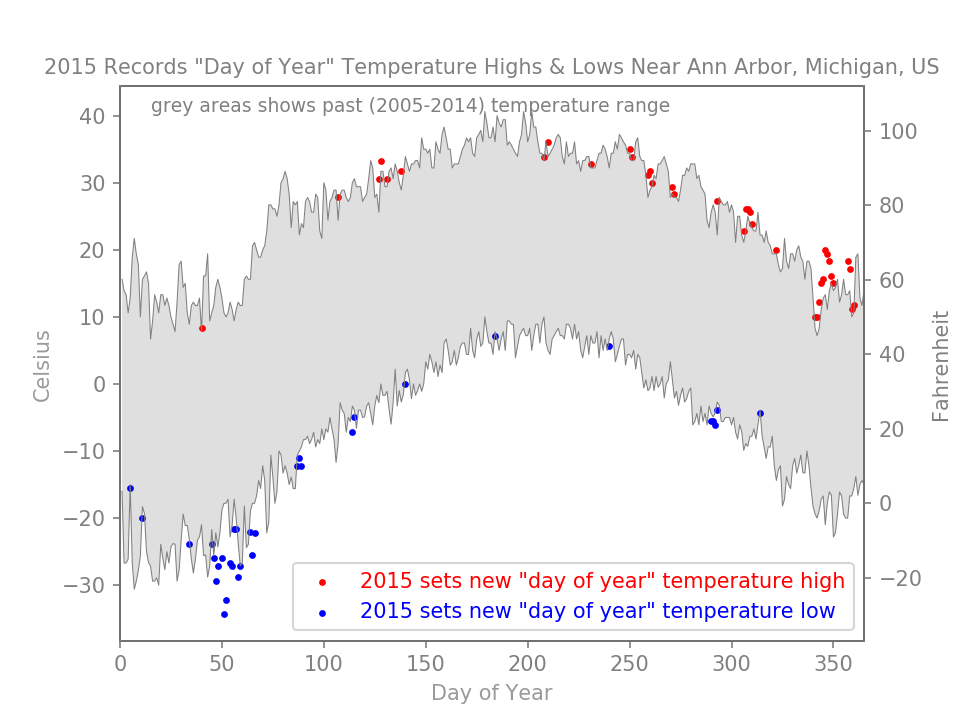

Text(15,105,'grey areas shows past (2005-2014) temperature range')

In [85]:
#17. draw two lines for maximum and minimum temperture and label graph, and make no legends
plt.figure()

plt.plot(max_not_2015_df, '-', color='grey', linewidth=0.5, label='_nolegend_')
plt.plot(min_not_2015_df, '-', color='grey', linewidth=0.5, label='_nolegend_')
#18 - label the x-axis and y-axis, and set the color of the axis
x_label = plt.xlabel('Day of Year', alpha=0.8)
x_label.set_color('grey')
y_label = plt.ylabel('Celsius', alpha=0.8)
y_label.set_color('grey')
#19. create a title, and set the color on font size of the text
plt.title('2015 Records "Day of Year" Temperature Highs & Lows Near Ann Arbor, Michigan, US',fontsize = 10, color='grey')


#20. highlight the difference between the blue and orange curves.
plt.gca().fill_between(range(1, 366), min_not_2015_df, max_not_2015_df, facecolor='grey', alpha=0.25)


#21. plot the scatter graph of 2015 max temp - greater than btwn 2005-2014  - the calender day it happend - on the same figure
plt.scatter(day_broke_max, max_temp, c='red', label='2015 sets new "day of year" temperature high', s=5)

#22. plot the scatter graph of 2015 min temp - less than btwn 2005-2014  - the calender day it happend - on the same figure
plt.scatter(day_broke_min, min_temp, c='blue', label='2015 sets new "day of year" temperature low', s=5)

#23. put the legend for the scatter points
plt.legend(fontsize=9)

#24. set the color of the legend text
ax = plt.gca()
leg = ax.legend()
colors = ['red', 'blue']
for color, text in zip(colors, leg.get_texts()):
    text.set_color(color)
#25. set the labels of ticks for x-axis and y-axis    
x = plt.gca().xaxis
[item.set_color('grey') for item in x.get_ticklabels()]

y = plt.gca().yaxis
[item.set_color('grey') for item in y.get_ticklabels()]
    
#26. get a second y-axis that calculates fahrenheit from celsius using the function about (see step 5b) 

ax_f = ax.twinx()
y1, y2 = ax.get_ylim()
ax_f.set_ylim(celsiustofahrenheit(y1), celsiustofahrenheit(y2))
#27. make the x-axix less wide
ax.set_xlim(0, 365)

#28. label the second y-axis
y_f_label = ax_f.set_ylabel('Fahrenheit')
#29. set the color of the second axis
y_f_label.set_color('grey')
y = plt.gca().yaxis
[item.set_color('grey') for item in y.get_ticklabels()]

#30. set the color of background rectangle
positions=['bottom', 'top', 'left', 'right']
[ax_f.spines[position].set_color('grey') for position in positions]

#31. set the color of the ticks for bottom and left side    
ax.tick_params(colors='grey', grid_alpha=0.5)
#31. set the color of the ticks for bottom and right side, i.e. the 2nd y-axis
ax_f.tick_params(colors='grey', grid_alpha=0.5)
#32. create a label to describe the diagram
plt.gca().text(15, 105, "grey areas shows past (2005-2014) temperature range", 
                 ha='left', color='grey', fontsize=9)

# Discussion

The year 2015 set new low temperatures - versus the period 2005-2014 - during the winter [**months.**](https://www.weather-us.com/en/michigan-usa-climate)  The North Pole vortex - [a large mass of cold and dense air over the north pole](https://www.forbes.com/sites/startswithabang/2019/01/30/this-is-why-global-warming-is-responsible-for-freezing-temperatures-across-the-usa/) - weakens during the winter months and migrates over [north America](https://www.forbes.com/sites/startswithabang/2019/01/30/this-is-why-global-warming-is-responsible-for-freezing-temperatures-across-the-usa/).  This causes the ['coldest winter weather we've seen recently.'](https://www.forbes.com/sites/startswithabang/2019/01/30/this-is-why-global-warming-is-responsible-for-freezing-temperatures-across-the-usa/)  Thus, perhaps, I think the mentioned process contributes to extreme cold weather over Michigan during Winter months.

But Global warming contributes too, I think.  Global warming increase land temperature, thus, makes stratospheric events more likely.  This destrablizes the North pole vortex, and this [brings cold air down to mid-latitudes.](https://www.forbes.com/sites/startswithabang/2019/01/30/this-is-why-global-warming-is-responsible-for-freezing-temperatures-across-the-usa/)

As well known, Global warming also increase temperature - reflected in the other [seasons](https://www.weather-us.com/en/michigan-usa-climate) near Michigan.  The graph shows the year 2015 setting new 'day of year' highs -versus the period 2005-2014 - during the other seasons near Michigan.

Please note, I do not reside in Michigan and I am not an expert about the weather.

# Recommendations

Please also note, instruments measure temperature at stations near Michigan.  Some of these may not work continuosly between the years 2004-2015, even for a few hours.  Thus, an extreme high and low temperature may have been missed during the year 2015 or during the period 2005-2014. To control this biasedness, perhaps, in future do analysis that focuses on one station where it is known the measuring instruments worked continuosly. 